### Question 2

In [155]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn import preprocessing


Define the random variable X = Z<sup>2<sub>1</sub></sup> + Z<sup>2<sub>2</sub></sup> + Z<sup>2<sub>3</sub></sup> + Z<sup>2<sub>4</sub></sup> where Z<sub>k</sub> ~ N(0,1)
Then X ~ _X_<sup>2</sup>(4). Generate 10 samples from X by first sampling Z<sub>i</sub> for i=  1, 2, 3, 4 and then computing X. Plot the empirical distribution F*<sub>10</sub>(x) for your samples and overlay the theoretical distribution F(x). Estimate a lower bound for || F*<sub>10</sub>(x) - F(x) || by computing the maximum difference at each of your samples: max || F*10(x) - F(x) || .Then find the 25th, 50th, and 90th percentiles using your empirical distribution and compare the value to the theoretical percentile values for _X_<sup>2</sup>(4). Repeat the above using 100 and 1000 samples from 𝑋.

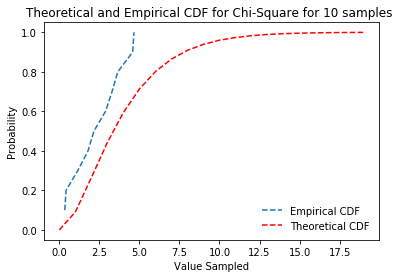

The empirical 25th percentile for 10 samples:  1.3143259886088627
The theoretical 25th percentile for 10 samples:  1.922557526229554


The empirical 50th percentile for 10 samples:  2.524952633145161
The theoretical 50th percentile for 10 samples:  3.3566939800333224


The empirical 90th percentile for 10 samples:  4.590206794311635
The theoretical 90th percentile for 10 samples:  7.779440339734858


The lower bound for 10 samples is:  0.3236556079311699


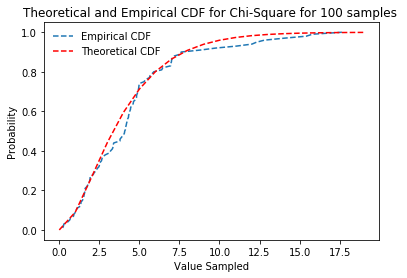

The empirical 25th percentile for 100 samples:  1.9164360873410389
The theoretical 25th percentile for 100 samples:  1.922557526229554


The empirical 50th percentile for 100 samples:  4.112472930068304
The theoretical 50th percentile for 100 samples:  3.3566939800333224


The empirical 90th percentile for 100 samples:  7.729292244815722
The theoretical 90th percentile for 100 samples:  7.779440339734858


The lower bound for 100 samples is:  0.11527913978899829


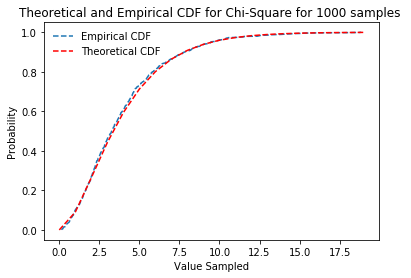

The empirical 25th percentile for 1000 samples:  1.9351940424756182
The theoretical 25th percentile for 1000 samples:  1.922557526229554


The empirical 50th percentile for 1000 samples:  3.2716323505773337
The theoretical 50th percentile for 1000 samples:  3.3566939800333224


The empirical 90th percentile for 1000 samples:  7.842871799399977
The theoretical 90th percentile for 1000 samples:  7.779440339734858


The lower bound for 1000 samples is:  0.029698521483102258


In [159]:
samples = [10, 100, 1000]
bins = [5, 15, 30]
ranges = [20,30,40]

for i in range (0,len(samples)):
    X = np.zeros(samples[i])
    diff = np.zeros(samples[i])
    for j in range(0,samples[i]):
        z1 = np.random.normal()
        z1 = z1 * z1

        z2 = np.random.normal()
        z2 = z2 * z2
        
        z3 = np.random.normal()
        z3 = z3 * z3
        
        z4 = np.random.normal()
        z4 = z4 * z4
        
        x = z1 + z2 + z3 + z4
        
        X[j] = x
    
    #for k in range(1,samples[i]+1):    
    #diff[k-1] = abs((X[k-1]/X.max() - stats.chi2.cdf(X[k-1], df = 4))
    
    #print(diff.tolist())
    #x_max = X.max()
    X.sort()
    for k in range(0,samples[i]):    
        samp = (k+1)/samples[i]
        diff[k] = abs(samp - stats.chi2.cdf(X[k], df = 4))
        #print((X[k]/x_max))
        #print(stats.chi2.cdf(X[k], df = 4))
        #print(X[k])
        #print(diff[X[k]])
    #print(diff)
    
    lower_bound = diff.max()
    
    Y = np.arange(1,len(X)+1)/len(X)
    plt.plot(X,Y, linestyle='dashed', label = 'Empirical CDF')
    
    x = np.arange(0,20)
    y = stats.chi2.cdf(x, df = 4)
    
    

    plt.plot(x,y, ms=8, label='Theoretical CDF', color = 'red', linestyle = 'dashed')
    plt.legend(loc='best', frameon=False)
    plt.xlabel("Value Sampled")
    plt.ylabel("Probability")
    plt.title('Theoretical and Empirical CDF for Chi-Square '
    'for {samples} samples '.format(samples=samples[i]))
    plt.show()
    
    #print(X)
    
    quant_25_emp = np.quantile(X, .25)
    quant_50_emp = np.quantile(X, .50)
    quant_90_emp = np.quantile(X, .90)
    
    quant_25_theo = stats.chi2.ppf(.25, df = 4)
    quant_50_theo = stats.chi2.ppf(.50, df = 4)
    quant_90_theo = stats.chi2.ppf(.90, df = 4)
    
    
    print('The empirical 25th percentile for {samples} ' 
          'samples: '.format(samples=samples[i]), str(quant_25_emp))
    print('The theoretical 25th percentile for {samples} ' 
          'samples: '.format(samples=samples[i]), str(quant_25_theo))
    print('\n')
    
    print('The empirical 50th percentile for {samples} ' 
          'samples: '.format(samples=samples[i]), str(quant_50_emp))
    print('The theoretical 50th percentile for {samples} ' 
          'samples: '.format(samples=samples[i]), str(quant_50_theo))
    print('\n')
    
    print('The empirical 90th percentile for {samples} ' 
          'samples: '.format(samples=samples[i]), str(quant_90_emp))
    print('The theoretical 90th percentile for {samples} ' 
          'samples: '.format(samples=samples[i]), str(quant_90_theo))
    print('\n')
    
    print('The lower bound for {samples} '
          'samples is: '.format(samples = samples[i]),str(lower_bound))

#### Q2 Analysis

- The three plots above are for each sample value: 10, 100 and 1000. 
- As the number of samples increases, the empirical CDF begins to resemble the theoretical CDF more and more.
- The 25th, 50th, and 90 percentiles for the empirical values also approach the theoretical values as the samples increase. 
- As the number of samples increases, the lower bound also gets closer and closer to zero by the Glivenko-Cantelli theorem, which states that as the number of samples approaches infinity the difference between the empirical and theoretical CDF would equal 0.